In [1]:
#code of Interactive Quantum Classifier Inspired by Quantum Open System Theory
#LINK https://ieeexplore.ieee.org/document/9533917

#LINK https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9533917

# Contains Bifurcation Diagram and Lyapunov Exponent

#this code was written by Fernando Maciano de Paula Neto (fernando@cin.ufpe.br) together with Eduardo Barreto Brito (ebb2@cin.ufpe.br)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from helpers.icq_methods import create_and_execute_classifier

In [3]:
def generate_diagram_and_exponent(logisticFun, iterations, last, display_lyapunov=True, n=10000, limInf=2.5, limSup=4, x=1e-5):
        r = np.linspace(limInf, limSup, n)
        lyapunov = np.zeros(n)
        x = x * np.ones(n)

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
        sharex=True)
        for i in range(iterations):
                x = logisticFun(r, x)
                # We compute the partial sum of the
                # Lyapunov exponent.
                lyapunov += np.log(abs(r - 2 * r * x))
                # We display the bifurcation diagram.
                if i >= (iterations - last):
                        ax1.plot(r, x, ',k', alpha=.25)
        
        ax1.set_xlim(limInf, limSup)
        ax1.set_title("Bifurcation diagram")

        if (display_lyapunov):
                # We display the Lyapunov exponent.
                # Horizontal line.
                ax2.axhline(0, color='k', lw=.5, alpha=.5)
                # Negative Lyapunov exponent.
                ax2.plot(r[lyapunov < 0],
                lyapunov[lyapunov < 0] / iterations,
                '.k', alpha=.5, ms=.5)
                # Positive Lyapunov exponent.
                ax2.plot(r[lyapunov >= 0],
                lyapunov[lyapunov >= 0] / iterations,
                '.r', alpha=.5, ms=.5)
                ax2.set_xlim(limInf, limSup)
                ax2.set_ylim(-2, 2)
                ax2.set_title("Lyapunov exponent")
        print(plt.tight_layout())

None


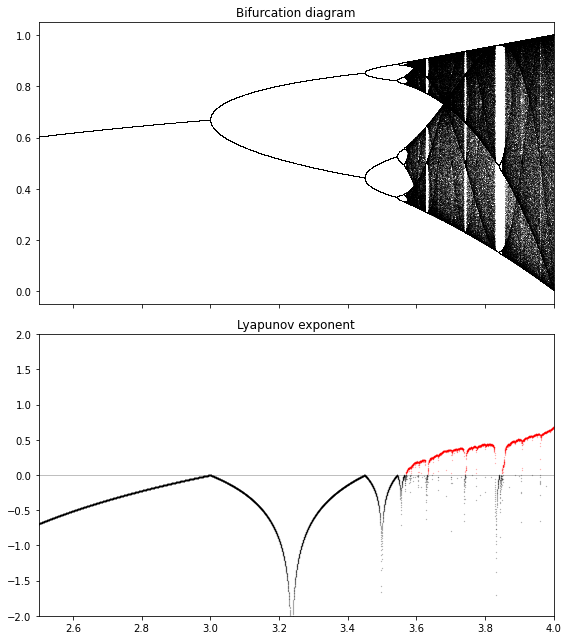

In [4]:
def logistic(r, x):
    return r * x * (1 - x)
generate_diagram_and_exponent(logistic, 100000, 100)

None


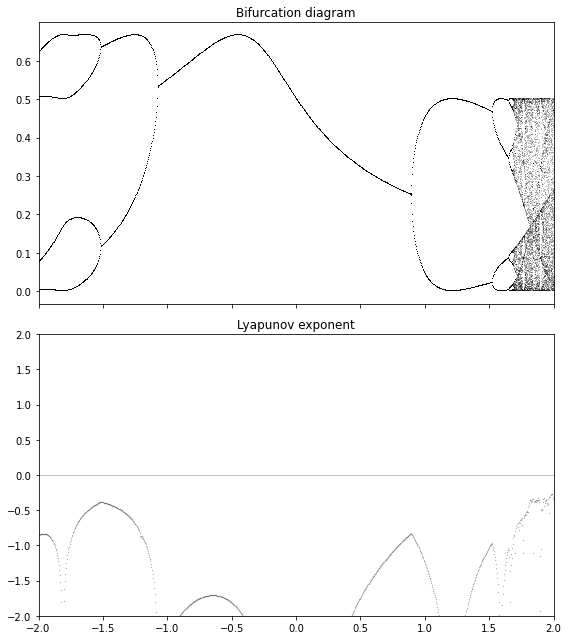

In [5]:
def logistic(r, x):
    result = []
    for r_n, x_n in zip(r,x):
      z,p_cog = create_and_execute_classifier(np.array([x_n]), np.array([r_n]))
      result.append(p_cog.real)
    return result
generate_diagram_and_exponent(logistic, 1000, 100, n=1000, limInf=-2, limSup=2)

None


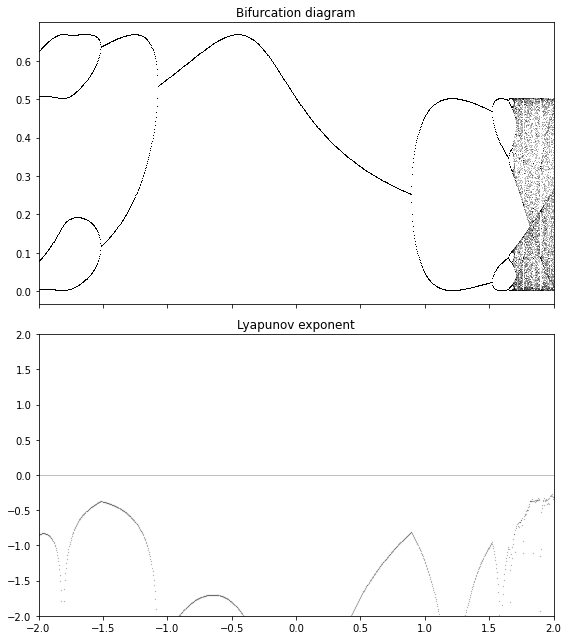

In [6]:
def logistic(r, x):
    result = []
    for r_n, x_n in zip(r,x):
      z,p_cog = create_and_execute_classifier(np.array([x_n]), np.array([r_n]))
      result.append(p_cog.real)
    return result
generate_diagram_and_exponent(logistic, 10000, 100, n=1000, limInf=-2, limSup=2)